In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import cluster

In [2]:
def averageDistToCenter(X,C):
    avdist = np.sum(np.sqrt(np.sum((X - C)**2,axis=0)),axis=0)
    avdist /= np.maximum(np.size(X,axis=1),1)
    return avdist

def KMeans(K, X, doPrinting=False):
    d = np.size(X,axis=0)
    N = np.size(X,axis=1)
    I = np.eye(K)
    R = X[:,np.random.randint(0,N,K)] #random start centers
    M = np.zeros((d,K)).astype(int)
    changes = True
    iters = 0
    while changes:
#         D = np.sum((R.T[np.newaxis,:,:] - X.T[:,np.newaxis,:])**2., axis=-1).T # distances from centers
        D = -2. * np.dot(X.T,R) + np.sum(R**2,axis=0,keepdims=True)# it is not necessary to add X^2
        m = np.argmin(D, axis=1)
        newM = np.take(I,m,axis=0).astype(int) # matrix of membership
        changes = not np.array_equal(M,newM)
        M = newM
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1) # new centers
        iters +=1
    if doPrinting:
        avDistToCenter = np.array([averageDistToCenter(X[:,M[:,i] == 1], R[:,i,np.newaxis]) for i in range(K)])
        groupSizes = np.sum(M.T,axis=1)
        print('Average distance to center within groups:\n',avDistToCenter)
        print("Iterations: ", iters, "\n")
        print("Group sizes: ", groupSizes, "\n")
    return R, M, m

Average distance to center within groups:
 [ 0.43931167  0.38814568  0.43076347]
Iterations:  19 

Group sizes:  [51 53 46] 

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 6.01 ms


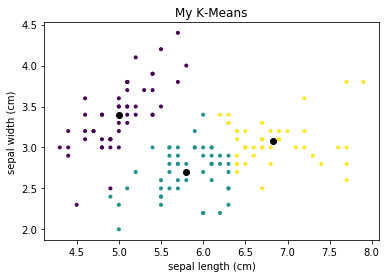

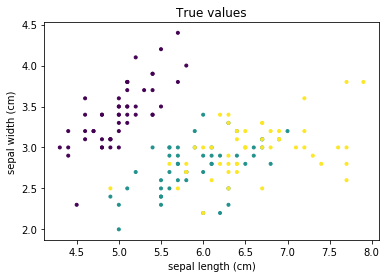

In [3]:
iris = datasets.load_iris()
irisData = np.array(iris.data).T
%time R, M, m = KMeans(3, irisData[:2,:], doPrinting=True)
X = irisData[:2,:]
# plt.subplot(1,2,1)
plt.scatter(X[0,:],X[1,:], marker='.',c=m)
plt.plot(R[0,:],R[1,:], 'ko')
plt.title("My K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
# plt.subplot(1,2,2)
plt.show()
plt.scatter(X[0,:],X[1,:], marker='.',c=iris.target)
plt.title("True values")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()

CPU times: user 40 ms, sys: 4 ms, total: 44 ms
Wall time: 48.4 ms


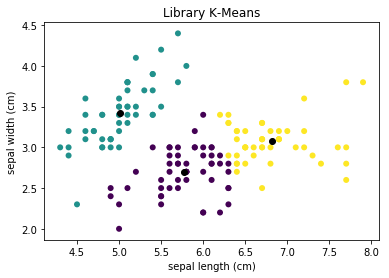

In [4]:
%time kmeans = cluster.KMeans(n_clusters=3, random_state=0).fit(irisData.T[:,:2])
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=kmeans.labels_, marker='o', lw = 0)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="Black", marker='o', lw = 1)
plt.title("Library K-Means")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()